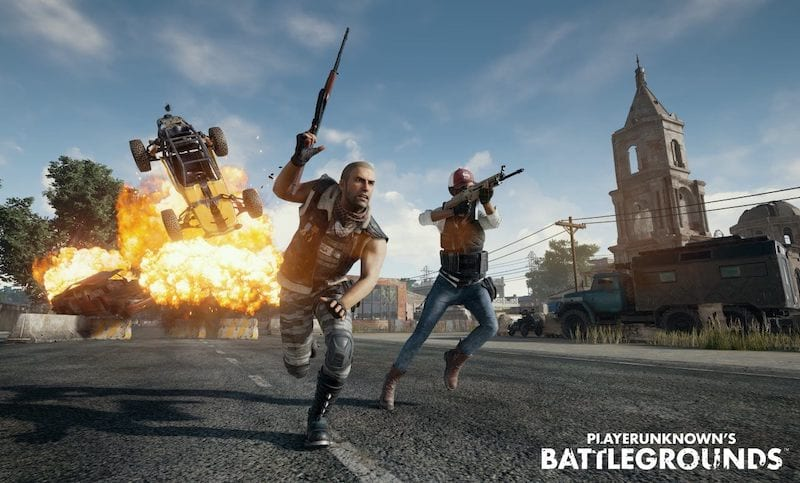

# PlayerUnknown's Battlegrounds (PUBG) is an online multiplayer battle royale game developed and published by PUBG Corporation, a subsidiary of South Korean video game company Bluehole. The game is based on previous mods that were created by Brendan "PlayerUnknown" Greene for other games, inspired by the 2000 Japanese film Battle Royale, and expanded into a standalone game under Greene's creative direction. In the game, up to one hundred players parachute onto an island and scavenge for weapons and equipment to kill others while avoiding getting killed themselves. The available safe area of the game's map decreases in size over time, directing surviving players into tighter areas to force encounters. The last player or team standing wins the round. 

# If you like it, Please upvote

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# Display max_column
pd.set_option('display.max_columns', 60)

In [ ]:
# load data
test = pd.read_csv("/kaggle/input/pubg-finish-placement-prediction/test_V2.csv")
train = pd.read_csv("/kaggle/input/pubg-finish-placement-prediction/train_V2.csv")

In [ ]:
# First 5 row of trainning dataset
train.head()

In [ ]:
# shape of trainning data
train.shape

In [ ]:
# null value of dataset
train.isna().sum()

Data fields

* DBNOs - Number of enemy players knocked.
* assists - Number of enemy players this player damaged that were killed by teammates.
* boosts - Number of boost items used.
* damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.
* headshotKills - Number of enemy players killed with headshots.
* heals - Number of healing items used.
* Id - Player’s Id
* killPlace - Ranking in match of number of enemy players killed.
* killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
* killStreaks - Max number of enemy players killed in a short amount of time.
* kills - Number of enemy players killed.
* longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
* matchDuration - Duration of match in seconds.
* matchId - ID to identify match. There are no matches that are in both the training and testing set.
* matchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
* rankPoints - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
* revives - Number of times this player revived teammates.
* rideDistance - Total distance traveled in vehicles measured in meters.
* roadKills - Number of kills while in a vehicle.
* swimDistance - Total distance traveled by swimming measured in meters.
* teamKills - Number of times this player killed a teammate.
* vehicleDestroys - Number of vehicles destroyed.
* walkDistance - Total distance traveled on foot measured in meters.
* weaponsAcquired - Number of weapons picked up.
* winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
* groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
* numGroups - Number of groups we have data for in the match.
* maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
* winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.


# EDA - Exploratory Data Analysis

In [ ]:
# Frequecy of different types of match
matchTypes = ["solo", "duo", "squad", "normal-solo", "normal-duo", "normal-squad", "solo-fpp", "duo-fpp", "squad-fpp", "normal-solo-fpp", "normal-duo-fpp", "normal-squad-fpp", "crashtpp", "flaretpp", "flarefpp", "crashfpp"]
train["matchType"].value_counts()[matchTypes].plot(kind="bar", figsize=(10,6), color="#ff8000")
plt.title("Frequecy of different types of match", fontweight="bold")

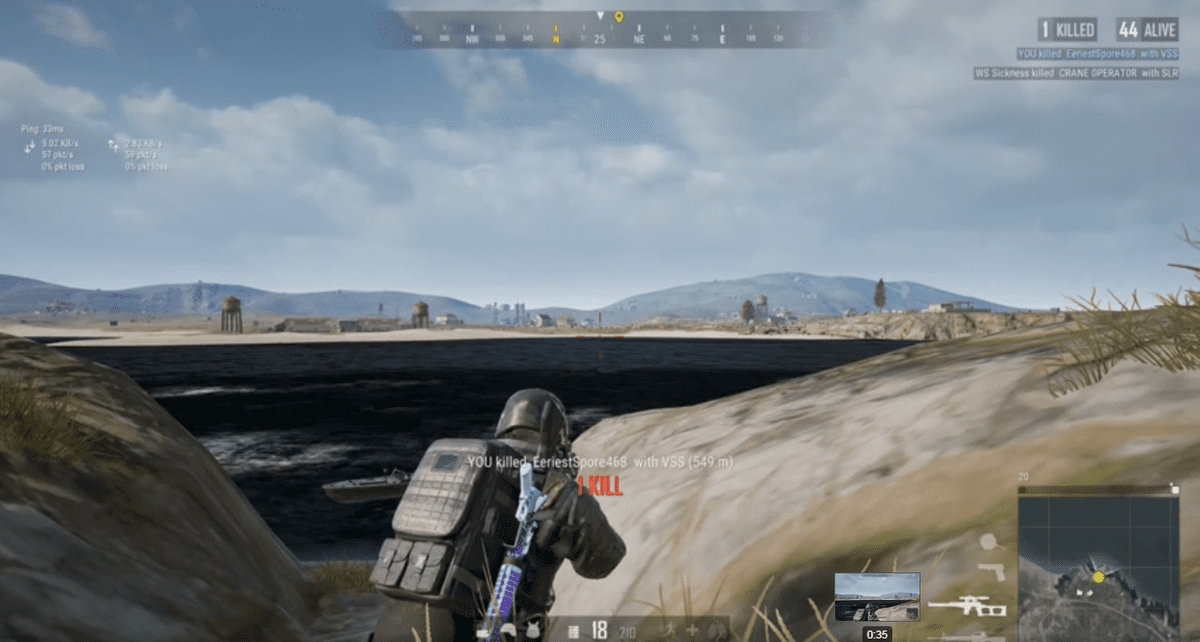

In [ ]:
# Frequency of Kill Counts
plt.subplots(figsize=(18,7))
sns.countplot(train['kills']).set_title("Kill Counts")

In [ ]:
# Useful information of dataset
train.info()

In [ ]:
# Total Headshot Kill Count
plt.subplots(figsize=(10,6))
sns.countplot(x=train["headshotKills"].astype('str').sort_values(), data=train).set_title("Head Shot Kills Count")

In [ ]:
# Revives frequency
sns.countplot(x=train["revives"])

In [ ]:
# Longest Survival Duration
train["damageDealt"].max()

In [ ]:
# win without damage
without_damage = train[train["damageDealt"]==0]
winning = len(without_damage[without_damage["winPlacePerc"]==1])
# longest ply duration
duration = len(train[train["matchDuration"]==2237])
# win without single kill
without_kill = train[train["kills"]==0]
without_kill_count = len(without_kill[without_kill["winPlacePerc"]==1])

In [ ]:
print(f"{winning} player win without dealing with damage")

print(f"{duration} player plays longest survival match")

print(f"{without_kill_count} player win without single kill")

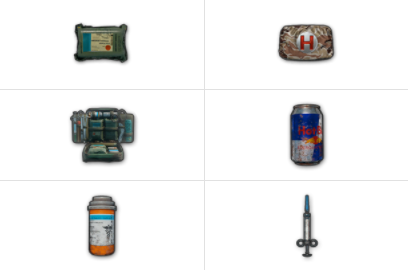

In [ ]:
# Healing item use
plt.subplots(figsize=(10, 6))
plt.title("Number Of Healing Item Used")
sns.distplot(train["heals"])

In [ ]:
# Player group... In solo no group, in duo minimum 50 group and in squad (25 * 4) minimum 25 group
solo_game = train[train["numGroups"] > 50]
solo = len(solo_game)

duo_game = train[(train["numGroups"] > 25) & (train["numGroups"] <= 50)]
duo = len(duo_game)

squad_game = train[train["numGroups"] <= 25]
squad = len(squad_game)

In [ ]:
print(f"{solo} solo game player\n {duo} player in duo\n and {squad} player in squad")

In [ ]:
solo_game

In [ ]:
# heal vs win percentage
plt.subplots(figsize=(16, 8))
sns.pointplot(x=solo_game["heals"], y=solo_game["winPlacePerc"], color="#ff6347")
plt.text(14,0.6, 'solo-heal vs win perc',color='#ff6347',fontsize = 17)
sns.pointplot(x=duo_game["heals"], y=duo_game["winPlacePerc"], color="#4ca3dd")
plt.text(14,0.64, 'duo-heal vs win perc',color='#4ca3dd',fontsize = 17)
sns.pointplot(x=squad_game["heals"], y=squad_game["winPlacePerc"], color="#212126")
plt.text(14,0.67, 'squad-heal vs win perc',color='#212126',fontsize = 17)

# Enemy Player Knocked
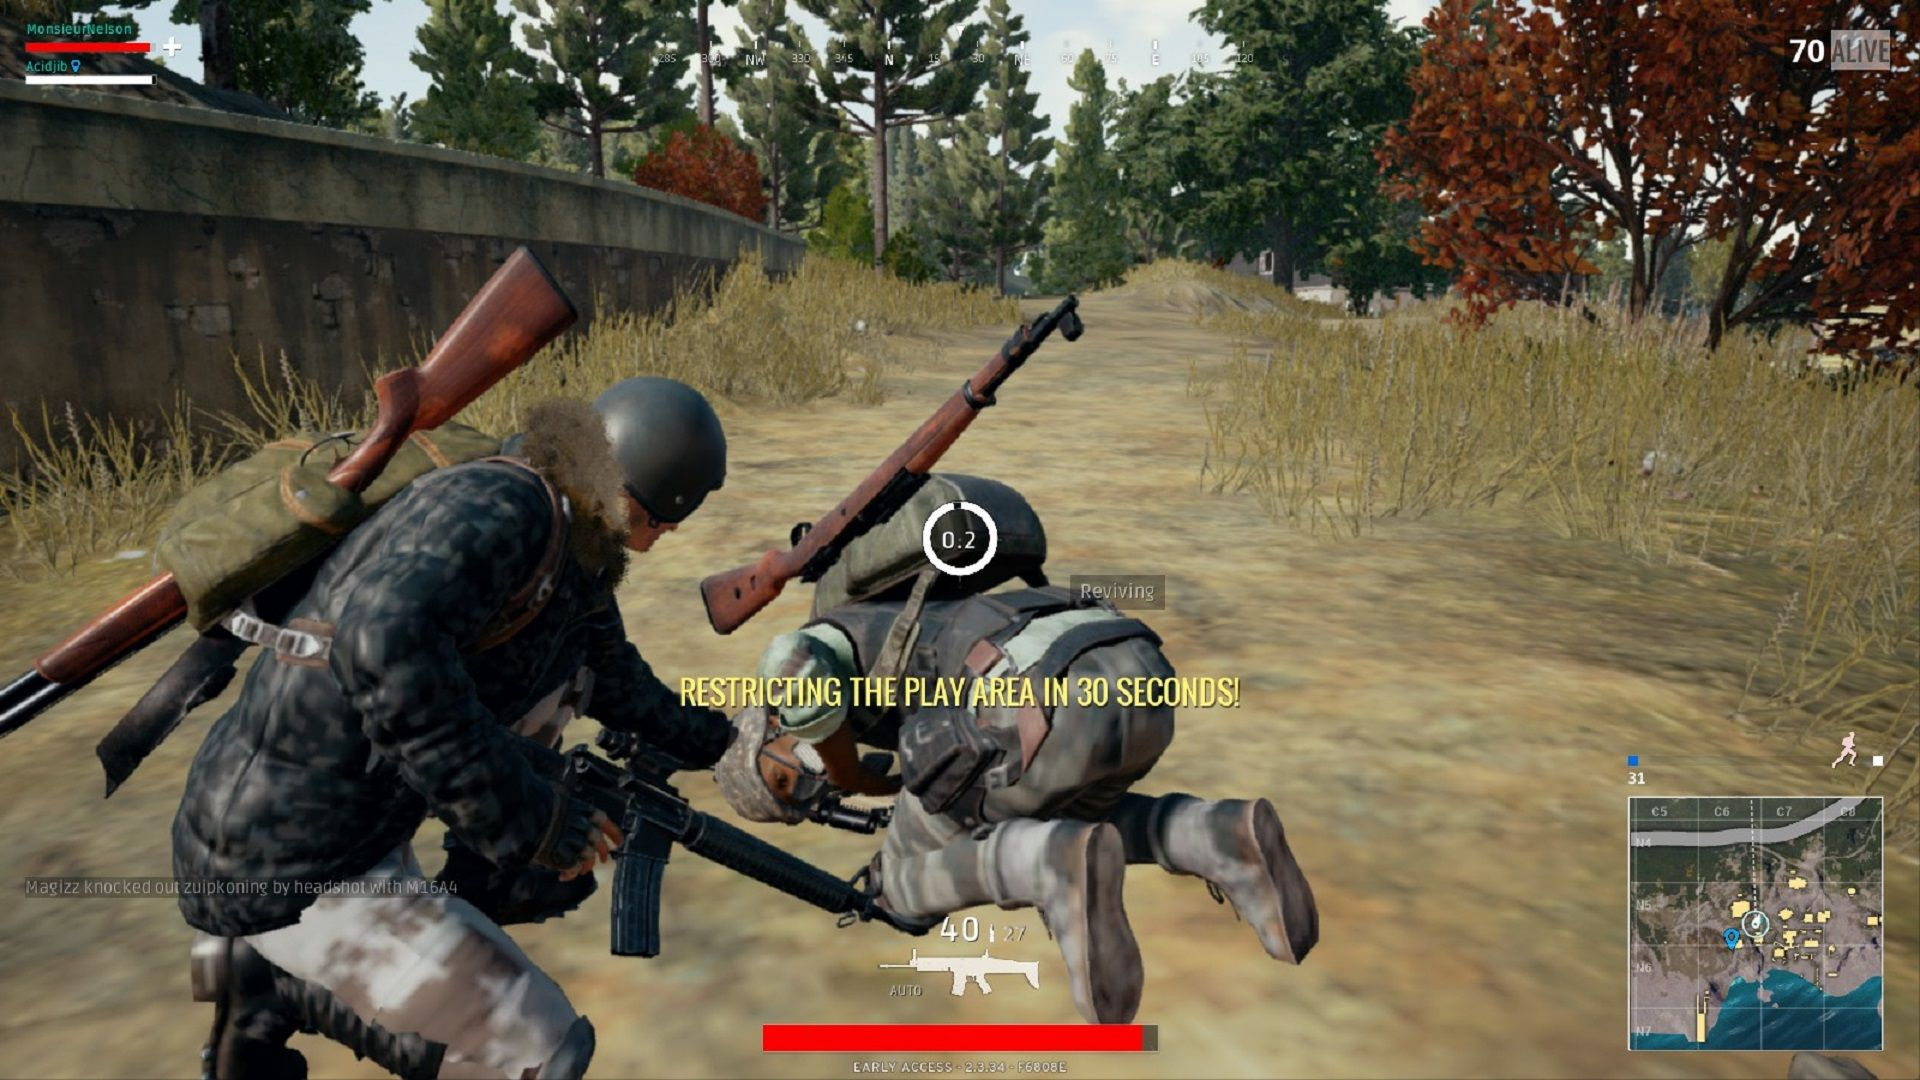

In [ ]:
# Number of enemy players knocked vs win percentage
# N.B In solo match their is no chance to knock
plt.subplots(figsize=(16,7))
sns.pointplot(x=duo_game["DBNOs"], y=duo_game["winPlacePerc"], color="#ff8000")
plt.text(14,0.5, "duo-DBNOs vs winPlacePerc", color="#ff8000")
sns.pointplot(x=squad_game["DBNOs"], y=squad_game["winPlacePerc"], color="#212126")
plt.text(14,0.53, "squad-DBNOs vs winPlacePerc", color="#212126")

In [ ]:
# Copy data
# Diffent Player has same Match ID
Data = train.copy()
Data["JoinServer"] = Data.groupby("matchId")["matchId"].transform("count")

In [ ]:
plt.subplots(figsize=(14,6))
a = Data[Data["JoinServer"]>49]
sns.countplot(a["JoinServer"])

In [ ]:
# correlation
corr_matrix = train[3:].corr()
corr_matrix["winPlacePerc"].sort_values(ascending=False)

In [ ]:
# heatmap
plt.subplots(figsize=(20,10))
sns.heatmap(corr_matrix,annot=True)

In [ ]:
# scatter matrix
from pandas.plotting import scatter_matrix
a = ["damageDealt", "winPlacePerc"]
scatter_matrix(solo_game[a], figsize=(10,6))

In [ ]:
a = ["damageDealt", "winPlacePerc"]
scatter_matrix(duo_game[a], figsize=(10,6))

In [ ]:
a = ["damageDealt", "winPlacePerc"]
scatter_matrix(squad_game[a], figsize=(10,6))

In [ ]:
# add distance
train["TotalDistance"] = train["rideDistance"] + train["swimDistance"] + train["walkDistance"]

In [ ]:
# create new DataFrame
new_data = train.groupby("Id")["TotalDistance", "heals", "winPlacePerc"].sum().sort_values(by="TotalDistance", ascending=False)
new = pd.DataFrame(new_data)[:40]

# First 40 who Traveled long distance

In [ ]:
plt.subplots(figsize=(20,8))
fig = sns.barplot(x=new.index, y="TotalDistance", data=new)
plt.xticks(rotation=90)

matchId - ID to identify match. There are no matches that are in both the training and testing set.

# Take a random match id and analyze. Different player has same match id.

In [ ]:
# for solo match
solo_match_random = train[(train["matchType"]=="solo") & (train["matchId"]=="ce9bc89b3ca08c")].reset_index()
# for duo match
duo_match_random = train[(train["matchType"]=="duo") & (train["matchId"]=="110163d8bb94ae")].reset_index()
# for squad match
squad_match_random = train[(train["matchType"]=="squad") & (train["matchId"]=="df014fbee741c6")].reset_index()

In [ ]:
duo_match_random

In [ ]:
# some analysis
def analysis_random_match(matchType):
    matchType["DamagePercentage"] = matchType["damageDealt"] / 100
    matchType["DamagePercentage"].plot(kind="bar", figsize=(18,7))
    
    chickenDinner = matchType[matchType["winPlacePerc"]==1]
    a = chickenDinner["DamagePercentage"].to_string(index=False)
    print(f"Damage by those who got Chicken Dinner is {a} percent")
    
    high = matchType["DamagePercentage"].max()
    id_no = matchType[matchType["DamagePercentage"] == high]
    sno = id_no["Id"].to_string(index=False)
    kill_enemy = id_no["killPlace"].to_string(index=False)
    duration = id_no["matchDuration"]/60
    print(f"High Damage is {high} by ID no. is {sno}\nEnemy Player Killed {kill_enemy}\nMatch Duration {duration.to_string(index=False)}min")
    matchType["headshotKills"].plot(kind="bar", figsize=(18,7), color="#212126")
    b = matchType["matchType"][:1]
    plt.title(f"DamagePercentage and headshotKills in {b.to_string(index=False)} match")
    plt.xlabel("ID No.")
    plt.legend()

In [ ]:
analysis_random_match(duo_match_random)

In [ ]:
analysis_random_match(solo_match_random)

In [ ]:
analysis_random_match(squad_match_random)

In [ ]:
# count of revive vs knock
def reviveVsDBNOs(typeMatch):
    plt.subplots(figsize=(14,6))
    sns.countplot(x="DBNOs", hue="revives", data=typeMatch)

In [ ]:
reviveVsDBNOs(duo_match_random)

In [ ]:
reviveVsDBNOs(squad_match_random)

# If You Like, Please Upvote

* work is progress